<a href="https://colab.research.google.com/github/navymaddox/DeepLearningWarships/blob/main/ShipClassDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import glob
import random 

# image
from PIL import Image

# visu
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow import repeat
from tensorflow.keras import backend as K
from tensorflow.keras import backend, models, layers, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
import os, shutil # Library for navigating files
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet101V2

np.random.seed(42)

In [ ]:
generator = ImageDataGenerator()
batches_consol   = generator.flow_from_directory('/content/drive/MyDrive/Practicum/Ships_Split/train/')

indices = batches_consol.class_indices

labels  = list(indices.keys())
print(labels[0:17])

Found 4358 images belonging to 18 classes.
['Aircraft Carrier', 'Amphibious Transport Dock', 'Cargo Ships', 'Corvette', 'Cruise Ships', 'Destroyer', 'Fast Attack Craft', 'Fast Combat Support', 'Frigate', 'Gunboat', 'Landing Craft Air Cushion', 'Landing Helicopter Dock', 'Landing Ship', 'Mine Countermeasure', 'Missile Boat', 'Patrol Craft', 'Submarine Chaser']


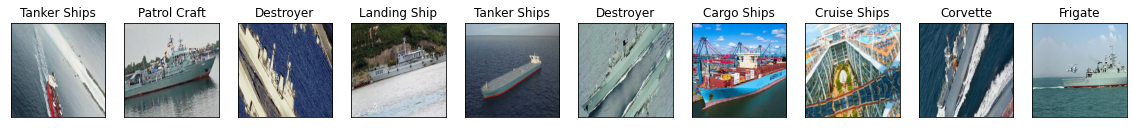

In [ ]:
for X, y in batches_consol:
    fig, ax = plt.subplots(1, 10, figsize=(20, 20))
    
    for i in range(0,10):
        img = X[i].astype('int')
        label = labels[np.argmax(y[i])]
        ax[i].imshow(img)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    
    plt.show()
    break # We only need the first batch

In [ ]:
train_dir = ('/content/drive/MyDrive/Practicum/Ships_Split/train/')
validation_dir = ('/content/drive/MyDrive/Practicum/Ships_Split/val/')
test_dir = ('/content/drive/MyDrive/Practicum/Ships_Split/test/')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(255, 255), 
    batch_size=16, 
    class_mode='categorical') 

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(255, 255),
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=16,
    class_mode='categorical')

#validation_generator = [tf.data.Dataset.from_tensors(validation_generator).repeat(3)]

Found 4358 images belonging to 18 classes.
Found 208 images belonging to 18 classes.
Found 232 images belonging to 18 classes.


In [ ]:
batch_size = 16
training_size = 4358
validation_size = 208
compute_steps_per_epoch = lambda x:int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(validation_size)
epoch = 100

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (255, 255, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
model.add(layers.MaxPool2D(pool_size=(3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(18, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epoch,
    validation_data=validation_generator,
    #validation_steps = val_steps,
    verbose = 1,
    shuffle = True,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights= True)])

test_loss, test_acc = model.evaluate(test_generator)

Epoch 1/100
273/273 [==============================] - 1426s 5s/step - loss: 2.5360 - accuracy: 0.1918 - val_loss: 2.3181 - val_accuracy: 0.2596
Epoch 2/100
273/273 [==============================] - 52s 191ms/step - loss: 2.2693 - accuracy: 0.2717 - val_loss: 2.1439 - val_accuracy: 0.3221
Epoch 3/100
273/273 [==============================] - 51s 186ms/step - loss: 2.0955 - accuracy: 0.3270 - val_loss: 2.1219 - val_accuracy: 0.3413
Epoch 4/100
273/273 [==============================] - 52s 190ms/step - loss: 1.8586 - accuracy: 0.3940 - val_loss: 2.1156 - val_accuracy: 0.3510
Epoch 5/100
273/273 [==============================] - 52s 190ms/step - loss: 1.5848 - accuracy: 0.4821 - val_loss: 2.0784 - val_accuracy: 0.3798
Epoch 6/100
273/273 [==============================] - 52s 189ms/step - loss: 1.2241 - accuracy: 0.6014 - val_loss: 2.3401 - val_accuracy: 0.4519
Epoch 7/100
273/273 [==============================] - 52s 190ms/step - loss: 0.9468 - accuracy: 0.6843 - val_loss: 2.7643 - 

In [ ]:
model = models.Sequential()
model.add(layers.Dropout(0.5))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu',kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu',kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu',kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(18, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    verbose = 1,
    shuffle = True,
    callbacks=[EarlyStopping(monitor='accuracy', patience=5, restore_best_weights= True)])

test_loss, test_acc = model.evaluate(test_generator)

Epoch 1/100
273/273 [==============================] - 1443s 5s/step - loss: 3.0092 - accuracy: 0.1450 - val_loss: 2.9770 - val_accuracy: 0.1442
Epoch 2/100
273/273 [==============================] - 56s 205ms/step - loss: 2.6366 - accuracy: 0.1849 - val_loss: 2.4562 - val_accuracy: 0.1875
Epoch 3/100
273/273 [==============================] - 55s 202ms/step - loss: 2.4783 - accuracy: 0.2180 - val_loss: 2.5204 - val_accuracy: 0.2067
Epoch 4/100
273/273 [==============================] - 54s 197ms/step - loss: 2.4048 - accuracy: 0.2359 - val_loss: 2.5407 - val_accuracy: 0.1971
Epoch 5/100
273/273 [==============================] - 54s 198ms/step - loss: 2.3171 - accuracy: 0.2588 - val_loss: 2.4949 - val_accuracy: 0.1971
Epoch 6/100
273/273 [==============================] - 54s 199ms/step - loss: 2.2885 - accuracy: 0.2694 - val_loss: 2.3933 - val_accuracy: 0.2596
Epoch 7/100
273/273 [==============================] - 54s 198ms/step - loss: 2.2085 - accuracy: 0.2836 - val_loss: 2.4193 - 

In [ ]:
backend.clear_session()
ResNet = ResNet101V2 (weights = 'imagenet',   
                  include_top = False, 
                  input_shape = (255, 255, 3))

for layer in ResNet.layers:
  layer.trainable = False
for layer in ResNet.layers:
  print(layer, layer.trainable)


print('ResNet base summary:', ResNet.summary())

171327488/171317808 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f3e92a5e250> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f3e92f06a10> False
<keras.layers.convolutional.Conv2D object at 0x7f3e91818ad0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f3e92a39ad0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3e9152b0d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3e913d6690> False
<keras.layers.core.activation.Activation object at 0x7f3e924d0050> False
<keras.layers.convolutional.Conv2D object at 0x7f3e91383250> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3e91383ad0> False
<keras.layers.core.activation.Activation object at 0x7f3e913f4350> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f3e913766d0> False
<keras.layers.convolutional.Conv2D object at 0x7f3e91383b50> False
<keras.layers.normalization.ba

In [ ]:
backend.clear_session()

modelResNet = Sequential()
modelResNet.add(ResNet)
modelResNet.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (255, 255, 3)))
modelResNet.add(layers.MaxPool2D(pool_size=(2, 2)))
modelResNet.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
modelResNet.add(layers.MaxPool2D(pool_size=(2, 2)))
modelResNet.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
modelResNet.add(layers.Flatten())
modelResNet.add(layers.Dense(120, activation='relu'))
modelResNet.add(layers.Dense(60, activation='relu'))
modelResNet.add(layers.Dropout(rate=0.2))
modelResNet.add(layers.Dense(18, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelResNet.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = modelResNet.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    verbose = 1,
    shuffle = True,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5,restore_best_weights= True)])



test_loss, test_acc = model.evaluate(test_generator)

Epoch 1/100
273/273 [==============================] - 63s 204ms/step - loss: 1.9244 - accuracy: 0.4004 - val_loss: 1.5401 - val_accuracy: 0.5433
Epoch 2/100
273/273 [==============================] - 54s 199ms/step - loss: 1.2950 - accuracy: 0.5851 - val_loss: 1.5330 - val_accuracy: 0.5673
Epoch 3/100
273/273 [==============================] - 54s 198ms/step - loss: 0.9562 - accuracy: 0.6957 - val_loss: 1.7041 - val_accuracy: 0.5481
Epoch 4/100
273/273 [==============================] - 54s 198ms/step - loss: 0.7037 - accuracy: 0.7799 - val_loss: 1.5709 - val_accuracy: 0.5817
Epoch 5/100
273/273 [==============================] - 54s 197ms/step - loss: 0.5189 - accuracy: 0.8435 - val_loss: 1.7314 - val_accuracy: 0.5962
Epoch 6/100
273/273 [==============================] - 54s 198ms/step - loss: 0.3952 - accuracy: 0.8862 - val_loss: 1.6275 - val_accuracy: 0.6010
Epoch 7/100
273/273 [==============================] - 54s 197ms/step - loss: 0.3088 - accuracy: 0.9096 - val_loss: 2.0799 -

In [ ]:
backend.clear_session()
from tensorflow.keras.applications import Xception
Xception = Xception (weights = 'imagenet',   
                  include_top = False, 
                  input_shape = (224, 224, 3))

for layer in Xception.layers:
  layer.trainable = False
for layer in Xception.layers:
  print(layer, layer.trainable)

print('Xception base summary:', Xception.summary())

83697664/83683744 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f3df38e7890> False
<keras.layers.convolutional.Conv2D object at 0x7f3def9282d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3e92a5ee50> False
<keras.layers.core.activation.Activation object at 0x7f3def911d90> False
<keras.layers.convolutional.Conv2D object at 0x7f3def8f1cd0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3df3b80b10> False
<keras.layers.core.activation.Activation object at 0x7f3def8f1650> False
<keras.layers.convolutional.SeparableConv2D object at 0x7f3defa99a50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3def923790> False
<keras.layers.core.activation.Activation object at 0x7f3def8e0310> False
<keras.layers.convolutional.SeparableConv2D object at 0x7f3def8d5c10> False
<keras.layers.normalization.batch_normalization.BatchNormalizati

In [ ]:
backend.clear_session()

modelXcept = Sequential()
modelXcept.add(Xception)
modelXcept.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (255, 255, 3)))
modelXcept.add(layers.MaxPool2D(pool_size=(2, 2)))
modelXcept.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
modelXcept.add(layers.MaxPool2D(pool_size=(2, 2)))
modelXcept.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
modelXcept.add(layers.Flatten())
modelXcept.add(layers.Dense(120, activation='relu'))
modelXcept.add(layers.Dense(60, activation='relu'))
modelXcept.add(layers.Dropout(rate=0.2))
modelXcept.add(layers.Dense(18, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelXcept.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = modelXcept.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    verbose = 1,
    shuffle = True,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights= True)])



test_loss, test_acc = modelXcept.evaluate(test_generator)


Epoch 1/100
273/273 [==============================] - 59s 202ms/step - loss: 2.1373 - accuracy: 0.3302 - val_loss: 1.8628 - val_accuracy: 0.3846
Epoch 2/100
273/273 [==============================] - 54s 198ms/step - loss: 1.6656 - accuracy: 0.4642 - val_loss: 2.0971 - val_accuracy: 0.3846
Epoch 3/100
273/273 [==============================] - 54s 197ms/step - loss: 1.4610 - accuracy: 0.5181 - val_loss: 1.6656 - val_accuracy: 0.4279
Epoch 4/100
273/273 [==============================] - 53s 195ms/step - loss: 1.2615 - accuracy: 0.5803 - val_loss: 1.6189 - val_accuracy: 0.4808
Epoch 5/100
273/273 [==============================] - 53s 195ms/step - loss: 1.1383 - accuracy: 0.6140 - val_loss: 1.5683 - val_accuracy: 0.4663
Epoch 6/100
273/273 [==============================] - 53s 193ms/step - loss: 0.9897 - accuracy: 0.6606 - val_loss: 1.7311 - val_accuracy: 0.5096
Epoch 7/100
273/273 [==============================] - 53s 192ms/step - loss: 0.8719 - accuracy: 0.7065 - val_loss: 1.9281 -

In [ ]:
backend.clear_session()
from tensorflow.keras.applications import VGG16
VGG16 = VGG16 (weights = 'imagenet',   
                  include_top = False, 
                  input_shape = (224, 224, 3))

for layer in VGG16.layers:
  layer.trainable = False
for layer in VGG16.layers:
  print(layer, layer.trainable)

print('VGG16 base summary:', VGG16.summary())

58900480/58889256 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f3def6e6810> False
<keras.layers.convolutional.Conv2D object at 0x7f3def731f10> False
<keras.layers.convolutional.Conv2D object at 0x7f3def6e2cd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3df3b97b50> False
<keras.layers.convolutional.Conv2D object at 0x7f3def1b1690> False
<keras.layers.convolutional.Conv2D object at 0x7f3def1b60d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3def6bb550> False
<keras.layers.convolutional.Conv2D object at 0x7f3d7a38aa10> False
<keras.layers.convolutional.Conv2D object at 0x7f3d7a3d2750> False
<keras.layers.convolutional.Conv2D object at 0x7f3def72b1d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3df17c5890> False
<keras.layers.convolutional.Conv2D object at 0x7f3df17c5250> False
<keras.layers.convolutional.Conv2D object at 0x7f3d7a372910> False
<keras.layers.convolutional.Conv2D object at 0x7f3d7a387550> F

In [ ]:
backend.clear_session()

modelVGG = Sequential()
modelVGG.add(VGG16)
modelVGG.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (255, 255, 3)))
modelVGG.add(layers.MaxPool2D(pool_size=(2, 2)))
modelVGG.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
modelVGG.add(layers.MaxPool2D(pool_size=(2, 2)))
modelVGG.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
modelVGG.add(layers.Flatten())
modelVGG.add(layers.Dense(120, activation='relu'))
modelVGG.add(layers.Dense(60, activation='relu'))
modelVGG.add(layers.Dropout(rate=0.2))
modelVGG.add(layers.Dense(18, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelVGG.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = modelVGG.fit(
    train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    verbose = 1,
    shuffle = True,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights= True)])



test_loss, test_acc = modelVGG.evaluate(test_generator)


Epoch 1/100
273/273 [==============================] - 54s 189ms/step - loss: 2.4628 - accuracy: 0.2022 - val_loss: 2.0249 - val_accuracy: 0.2885
Epoch 2/100
273/273 [==============================] - 51s 185ms/step - loss: 2.0229 - accuracy: 0.3362 - val_loss: 1.7978 - val_accuracy: 0.3894
Epoch 3/100
273/273 [==============================] - 52s 189ms/step - loss: 1.7268 - accuracy: 0.4429 - val_loss: 1.7257 - val_accuracy: 0.4375
Epoch 4/100
273/273 [==============================] - 51s 188ms/step - loss: 1.5615 - accuracy: 0.4832 - val_loss: 1.8772 - val_accuracy: 0.4038
Epoch 5/100
273/273 [==============================] - 51s 188ms/step - loss: 1.4802 - accuracy: 0.5083 - val_loss: 1.7118 - val_accuracy: 0.4808
Epoch 6/100
273/273 [==============================] - 51s 186ms/step - loss: 1.3151 - accuracy: 0.5603 - val_loss: 1.7719 - val_accuracy: 0.4663
Epoch 7/100
273/273 [==============================] - 52s 189ms/step - loss: 1.1984 - accuracy: 0.5994 - val_loss: 1.8710 -